In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_curve, auc, confusion_matrix, accuracy_score
from seaborn import heatmap

def plot_roc_curve(y_true, y_probas, title='ROC Curves',
                   plot_micro=True, plot_macro=True, classes_to_plot=None,
                   ax=None, figsize=None, cmap='nipy_spectral',
                   title_fontsize="large", text_fontsize="medium"):
    y_true = np.array(y_true)
    y_probas = np.array(y_probas)

    classes = np.unique(y_true)
    probas = y_probas

    if classes_to_plot is None:
        classes_to_plot = classes

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    ax.set_title(title, fontsize=title_fontsize)

    fpr_dict = dict()
    tpr_dict = dict()

    indices_to_plot = np.in1d(classes, classes_to_plot)
    for i, to_plot in enumerate(indices_to_plot):
        fpr_dict[i], tpr_dict[i], _ = roc_curve(y_true, probas[:, i],
                                                pos_label=classes[i])
        if to_plot:
            roc_auc = auc(fpr_dict[i], tpr_dict[i])
            color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
            ax.plot(fpr_dict[i], tpr_dict[i], lw=2, color=color,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                          ''.format(classes[i], roc_auc))
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=text_fontsize)
    ax.set_ylabel('True Positive Rate', fontsize=text_fontsize)
    ax.tick_params(labelsize=text_fontsize)
    ax.legend(loc='lower right', fontsize=text_fontsize)
    return ax

def classify(m, X, y):
  y_pred = []
  y_prob = []
  for i in range(len(y)):
    X_test = X[i, :].reshape(1, -1)
    X_train = np.delete(X, i, axis=0)
    y_test = y[i]
    y_train = np.delete(y, i)
    m.fit(X_train, y_train)
    y_pred.append(m.predict(X_test))
    y_prob.append(m.predict_proba(X_test))
  y_prob = np.squeeze(y_prob)
  y_pred = np.squeeze(y_pred)
  return y_prob, y_pred

def plot_model(m, X, y, labels):
  y_prob, y_pred = classify(m, X, y)
  print('Accuracy score: ' + str(accuracy_score(y, y_pred)))
  heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()
  heatmap(confusion_matrix(y, y_pred, normalize='true'), annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()
  plot_roc_curve(y, y_prob, plot_macro='False', plot_micro='False')
  plt.show()
  return y_prob, y_pred

In [4]:
import os
import pandas as pd

root = './gdrive/My Drive/thesis'
#df = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
#result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
#df = df.loc[result.index.values]
df = pd.read_csv(os.path.join(root, 'normVSpat.csv'), header=0)
print(df)
df[df.columns[-1]].value_counts()

     PATTERN1  PATTERN2  PATTERN3  ...  PATTERN17  PATTERN18  Diagnosi
0           1         1         1  ...          3          1         3
1           3         3         1  ...          3          3         3
2           1         1         1  ...          3          0         3
3           2         1         2  ...          3          1         3
4           2         3         1  ...          1          1         3
..        ...       ...       ...  ...        ...        ...       ...
245         3         3         0  ...          1          1         1
246         3         3         3  ...          3          3         1
247         3         1         1  ...          3          1         1
248         2         1         0  ...          1          1         1
249         3         3         0  ...          1          1         1

[250 rows x 19 columns]


3    193
1     57
Name: Diagnosi, dtype: int64

In [6]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

'''def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2

y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]'''
def label(n):
  return 0 if n==1 else 1

y = df.iloc[:,-1].to_numpy()
y_3 = np.array(list(map(label, y)))
print(y_3)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
#X = result.to_numpy()
X = df.iloc[:,:-1].to_numpy()
print(X)
scaler_norm_pat = StandardScaler().fit(X)
X_s = scaler_norm_pat.transform(X)
print(X.shape)

y_norm_pat = np.array([0 if s==0 else 1 for s in y_3])
print(y_norm_pat)


[[1 1 1 ... 3 3 1]
 [3 3 1 ... 3 3 3]
 [1 1 1 ... 0 3 0]
 ...
 [3 1 1 ... 2 3 1]
 [2 1 0 ... 3 1 1]
 [3 3 0 ... 3 1 1]]
(250, 18)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True, random_state=0), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_norm_pat)

names = ['poly']
for m in [svm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  print('model : {}'.format(m_best))
  #plot_model(m_best, X_s, y_norm_pat, ['NORMAL', 'PATHOLOGICAL'])

m_norm_pat = svm_poly.best_estimator_


Fitting 250 folds for each of 90 candidates, totalling 22500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 11100 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 14720 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 18024 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 21988 tasks      | elapsed:  5.9min


LOOCV score = 0.772
model : SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=2, gamma='scale',
    kernel='poly', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=2, gamma='scale',
    kernel='poly', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


[Parallel(n_jobs=-1)]: Done 22500 out of 22500 | elapsed:  6.3min finished


Accuracy score: 0.772


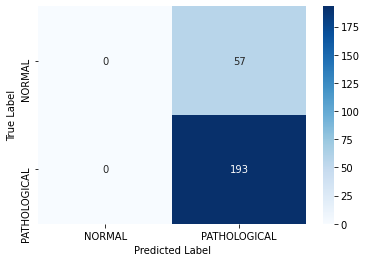

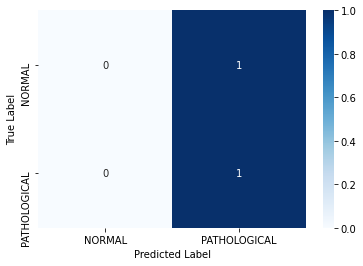

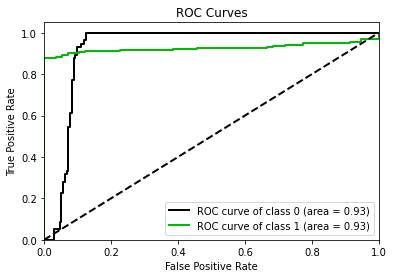

Accuracy score: 0.772


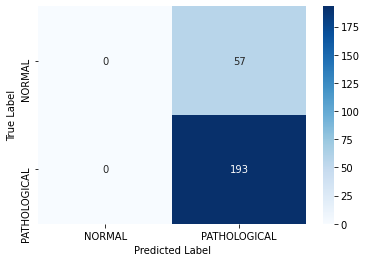

In [9]:
y_prob_norm_pat, y_pred1 = plot_model(m_norm_pat, X_s, y_norm_pat, ['NORMAL', 'PATHOLOGICAL'])
print('Accuracy score: ' + str(accuracy_score(y_3, y_pred1)))
labels = ['NORMAL', 'PATHOLOGICAL']
heatmap(confusion_matrix(y_3, y_pred1), annot=True, fmt= 'd', cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Ignora da qui in poi

In [ ]:
idx_2 = np.where(y_3 != 0)[0]
X_mci_dem = X[idx_2]
scaler_mci_dem = StandardScaler().fit(X_mci_dem)
X_s_mci_dem = scaler_mci_dem.transform(X_mci_dem)
y_mci_dem = y_3[idx_2] - 1
print(np.bincount(y_mci_dem))

In [ ]:
X_mci_dem

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True, random_state=0), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s_mci_dem, y_mci_dem)

for m in [svm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  print('model : {}'.format(m_best))
  #plot_model(m_best, X_s_mci_dem, y_mci_dem, ['MCI', 'DEMENTIA'])

m_MCI_dem = svm_poly.best_estimator_


In [ ]:
y_prob_norm_pat, y_pred1 = plot_model(m_norm_pat, X_s, y_norm_pat, ['NORMAL', 'PATHOLOGICAL'])
y_prob_MCI_dem, y_pred2 = plot_model(m_MCI_dem, X_s_mci_dem, y_mci_dem, ['MCI', 'DEMENTIA'])


In [ ]:
print(y_3)
print(y_pred1)
print(y_pred2+1)
print(y_3.shape)
print(y_pred1.shape)
print(y_pred2.shape)
patologici = np.where(y_pred1 == 1)[0]
print(idx_2)
print(patologici)

In [ ]:
pat_intersect = np.intersect1d(patologici, idx_2)
print(pat_intersect)

In [ ]:
print(len(pat_intersect))

In [ ]:
print(np.array([i in pat_intersect for i in idx_2]))
classified_pat = np.array([i in pat_intersect for i in idx_2])

In [ ]:
y_finale = y_pred1.copy()
selected = y_pred2[classified_pat] + 1
print(selected)
y_finale[pat_intersect] = selected
print(y_finale)

In [ ]:
print(y_3)

In [ ]:
print('Accuracy score: ' + str(accuracy_score(y_3, y_finale)))
labels = ['NORMAL', 'MCI', 'DEMENTIA']
heatmap(confusion_matrix(y_3, y_finale), annot=True, fmt= 'd', cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
heatmap(confusion_matrix(y_3, y_finale, normalize='true'), annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()